<h1> <center> Classification Model for Analyzing Product Sentiment  </h1> <center>
    <h2> Using scikit-learn </h2>
    
Source: [ML Foundationsx, Washington University-Coursera](https://www.coursera.org/learn/ml-foundations/supplement/phb1M/analyzing-product-sentiment-assignment)
    
  

Other handy links: 

- [https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/](https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/)    
- [https://www.codespeedy.com/predict_proba-for-classification-problem-in-python/] (https://www.codespeedy.com/predict_proba-for-classification-problem-in-python/)  

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# <center> Load and Explore Data <center>

### <center>Load product review data <center>

In [2]:
products_df = pd.read_csv('./data/amazon_baby.csv')

In [3]:
products_df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


### <center> Explore <center> 

In [4]:
pd.DataFrame(products_df['name'].value_counts())

,name
Vulli Sophie the Giraffe Teether,785
"Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L",562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision,561
Baby Einstein Take Along Tunes,547
"Cloud b Twilight Constellation Night Light, Turtle",520
...,...
The Kids Room The Princess Sleeps Here with Green and Pink Oval Wall Plaque,1
Disney Baby Mickey Mouse Fleece Baby Blanket Embroidered Appliqued,1
Philips AVENT BPA Free 6-Pack Bottles - 9 oz.,1
Philips AVENT 4 Oz. BPA Free Bottles - 6 Pack,1


<AxesSubplot:title={'center':'Rating'}, xlabel='Rating', ylabel='Count'>

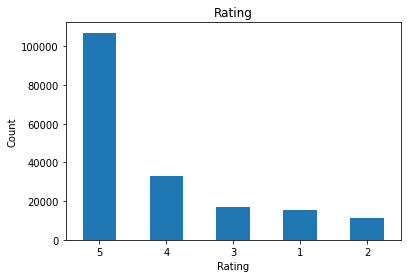

In [5]:
products_df['rating'].value_counts().plot(kind='bar'
                                          , title='Rating'
                                          , rot=0
                                          , xlabel='Rating'
                                          , ylabel='Count'
                                         )

### <center> Examine the reivews for the most-reviewed product <center> 

In [6]:
# name of most-reviewed product
popular = products_df['name'].value_counts().index[0]
popular

'Vulli Sophie the Giraffe Teether'

In [7]:
# review for the most-reviewed
giraffe_reviews_df = products_df[products_df['name']==popular]
giraffe_reviews_df

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5
...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5
159652,Vulli Sophie the Giraffe Teether,My baby who is currently teething love his Sop...,5


In [8]:
len(giraffe_reviews_df)

785

<AxesSubplot:title={'center':'Ratings for Vulli Sophie the Giraffe Teether'}, xlabel='Rating', ylabel='Count'>

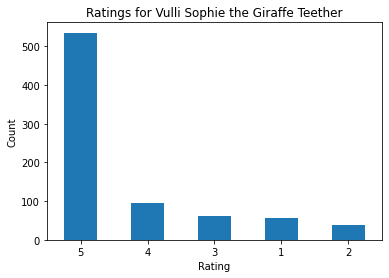

In [9]:
giraffe_reviews_df['rating'].value_counts().plot(kind='bar'
                                                 , rot=0
                                                 , title='Ratings for Vulli Sophie the Giraffe Teether'
                                                 , xlabel='Rating'
                                                 , ylabel='Count'
                                                )

# <center> Build a sentiment classifier <center>  

### <center> Build word count vectors <center> 

Source: [https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/](https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform(products_df['review'].astype('U'))
matrix


<183531x68032 sparse matrix of type '<class 'numpy.int64'>'
	with 9836154 stored elements in Compressed Sparse Row format>

In [11]:
# This may give memory error, to fix it do as root:
# echo 1 > /proc/sys/vm/overcommit_memory
# Source: https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type
counts_df = pd.DataFrame(matrix.toarray()
                      , index=products_df['name']
                      , columns=vectorizer.get_feature_names()
                     )


/home/potalvar/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
counts_df.shape

(183531, 68032)

In [13]:
counts_df[0:2]

,00,000,0001,000ft,000importer,000sqft,001,001cm,00am,00amcreepy,...,zydeco,zzz,zzzipme,zzzs,zzzz,zzzzz,zzzzzs,zzzzzz,zzzzzzz,zzzzzzzzzzz
name,,,,,,,,,,,,,,,,,,,,,
Planetwise Flannel Wipes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Planetwise Wipe Pouch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# smaller data frame for faster runs/tests
#small_counts_df = counts_df.iloc[0:13,:]
#small_counts_df.shape

<br/> 

__Products with 'awesome' in their reviews__

In [15]:
pd.DataFrame(counts_df[counts_df.loc[:,'awesome']==1].loc[:,'awesome'])

,awesome
name,
"IKEA KLADD PRICKAR Bib, blue, red",1
Pedal Farm Tractor,1
Baby Trend Diaper Champ,1
Baby Trend Diaper Champ,1
Baby Trend Diaper Champ,1
...,...
"Toddler Pillow - Soft Hypoallergenic - Best Pillows for Better Neck Support and Sleeping! They Will Take a Better Nap in Bed, a Crib, or Even on the Floor at School! Makes Travel Comfier in a Car Seat or on an Airplane! Backed by Our 90-Day No-Questions Asked Guarantee!",1
Summer Infant Ultra Sight Pan/Scan/Zoom Baby Video Monitor,1
Maxboost iPhone 5S/5 Case - Protective Snap-on Hard Case Slim Rugged Cover [Not compatible to Apple iPhone 6 Air 5c 4s 4 3gs],1


<br>

__Get only the counts for a subset of words__

In [16]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [17]:
counts_df.index[0]

'Planetwise Flannel Wipes'

In [18]:
# visualize first on the small df
#small_subset_counts_df = pd.DataFrame(small_counts_df.loc[:,selected_words])
#small_subset_counts_df

In [19]:
# now do it for the complete set
subset_counts_df = pd.DataFrame(counts_df.loc[:,selected_words])
subset_counts_df.shape

(183531, 11)

<br>

_Get total number of reviews that contain each word in the list of selected_words_

In [20]:
counts_dict = dict()
for word in selected_words:
    print(word, subset_counts_df[word].sum())
    counts_dict[word] = subset_counts_df[word].sum()

awesome 4075
great 59536
fantastic 1765
amazing 2726
love 43867
horrible 1245
bad 4950
terrible 1282
awful 753
wow 461
hate 1285


<br>

Get the word from the selected_words list with the maximum and minimum number of appearances

In [21]:
max(counts_dict.items(), key=lambda x: x[1])

('great', 59536)

<br>

### <center> Define what is positive and negative sentiment <center> 
    
Create a new column that gives
    
- 1 if it is a positive review: when the rating is 5 or 4
- 0 if it is a negative review: when the rating is 1 or 2

i.e. exclude rating=3

In [22]:
# set name as index of products_df
products_df.set_index('name', inplace=True)
#products_df

__first only for the data frame with the selected words__

In [23]:
# add the column rating to the data frame
subset_counts_df['review'] = products_df['review']
subset_counts_df['rating'] = products_df['rating']
#subset_counts_df

In [24]:
#ignore all 3*  reviews
subset_counts_df = subset_counts_df[subset_counts_df['rating']!= 3]

In [25]:
#positive sentiment = 4-star or 5-star reviews
sentiment = [1 if x >= 4 else 0 for x in subset_counts_df.loc[:,'rating']]
subset_counts_df['sentiment'] = sentiment


In [26]:
subset_counts_df.head(2)

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,review,rating,sentiment
name,,,,,,,,,,,,,,
Planetwise Wipe Pouch,0,0,0,0,1,0,0,0,0,0,0,it came early and was not disappointed. i love...,5,1
Annas Dream Full Quilt with 2 Shams,0,0,0,0,0,0,0,0,0,0,0,Very soft and comfortable and warmer than it l...,5,1


<br>

__For the complete data frame (wiht all words)__

THIS ONE UNFORTUNATELY CANNOT RUN IN THE JUPYTER NOTEBOOK. IT RUNS OUT OF MEMORY

In [27]:
# add the column rating to the data frame
#counts_df['review'] = products_df['review']
#counts_df['rating'] = products_df['rating']
#subset_counts_df

In [28]:
#ignore all 3*  reviews
#counts_df = counts_df[counts_df['rating']!= 3]

In [29]:
#positive sentiment = 4-star or 5-star reviews
#sentiment_2 = [1 if x >= 4 else 0 for x in counts_df.loc[:,'rating']]
#counts_df['sentiment'] = sentiment_2


In [30]:
#counts_df.shape

### <center> Train a sentiment classifier <center>  

##### Train with only selected_words


In [31]:
# split into train and test sets

x = subset_counts_df[selected_words]
y = subset_counts_df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )
x_train.shape

(133401, 11)

In [32]:
# define a logistic regression object and fit
selected_words_model = LogisticRegression()
selected_words_model.fit(x_train, y_train)

LogisticRegression()

<br>

__Evaluate the selected_words_model__

<br>

Visualize the predictions using the metrics classification report

In [33]:
# evaluate (i.e. predict on the test set)
y_pred = selected_words_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
# The predict() method gives the output target as the target with the highest probability in the predict_proba() method.
y_probs = selected_words_model.predict_proba(x_test)
y_probs

array([[0.20918129, 0.79081871],
       [0.20918129, 0.79081871],
       [0.20918129, 0.79081871],
       ...,
       [0.04490398, 0.95509602],
       [0.10032881, 0.89967119],
       [0.20918129, 0.79081871]])

In [35]:
# get the max prob, i.e. the prob of the class selected as the predicted value
y_max_proba = [max(x) for x in y_probs]
y_max_proba[0:3]

[0.7908187072161226, 0.7908187072161226, 0.7908187072161226]

In [36]:
selected_words_model.score(x_test, y_test)

0.8490000299841084

In [37]:
metrics.classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.72      0.07      0.13      5274\n           1       0.85      0.99      0.92     28077\n\n    accuracy                           0.85     33351\n   macro avg       0.78      0.53      0.53     33351\nweighted avg       0.83      0.85      0.79     33351\n'

<br>

_roc_auc_score and f1_score_

The ‘roc_auc_score’ is the area under the receiving operating characteristic curve. It is a measure of how well the binary classification model can distinguish classes. A ‘roc_auc_score’ of 0.5 means the model is unable to distinguish between classes. Values close to 1.0 correspond to a strong separation between classes. 

The ‘f1_score’ is the harmonic mean of precision and recall. Similar to ‘roc_auc_score’, a perfect ‘f1_score’ is equal to 1.0

In [38]:
metrics.roc_auc_score(y_test, y_pred)

0.5344209850669476

In [39]:
metrics.f1_score(y_test, y_pred)

0.9172826122663513

<br>

# <center>  Apply the sentiment classifier to better understand the Giraffe reviews <center>

<br>

__Add the predictions to the data frame as a column__

Predict over the entire data set (both train and test)

In [40]:
# The predict() method gives the output target as the target with the highest probability in the predict_proba() method.
selected_words_model_pred = selected_words_model.predict(x)
selected_words_model_pred

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
# The predict() method gives the output target as the target with the highest probability in the predict_proba() method.
selected_words_model_probas = selected_words_model.predict_proba(x)
selected_words_model_probas

array([[0.06179761, 0.93820239],
       [0.20918129, 0.79081871],
       [0.01613759, 0.98386241],
       ...,
       [0.04490398, 0.95509602],
       [0.20918129, 0.79081871],
       [0.06179761, 0.93820239]])

In [42]:
# get the max prob, i.e. the prob of the class selected as the predicted value
selected_words_model_max_proba = [max(x) for x in selected_words_model_probas]
selected_words_model_max_proba[0:3]

[0.9382023934017352, 0.7908187072161226, 0.9838624092775387]

In [43]:
subset_counts_df['predicted_sentiment'] = selected_words_model_pred
subset_counts_df['predicted_sentiment_prob'] = selected_words_model_max_proba
subset_counts_df[0:2]

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,review,rating,sentiment,predicted_sentiment,predicted_sentiment_prob
name,,,,,,,,,,,,,,,,
Planetwise Wipe Pouch,0,0,0,0,1,0,0,0,0,0,0,it came early and was not disappointed. i love...,5,1,1,0.938202
Annas Dream Full Quilt with 2 Shams,0,0,0,0,0,0,0,0,0,0,0,Very soft and comfortable and warmer than it l...,5,1,1,0.790819


<br>

__Get reviews for 'Vulli Sophie the Giraffe Teether'__

In [44]:
giraffe_reviews = subset_counts_df[subset_counts_df.index == 'Vulli Sophie the Giraffe Teether']

In [45]:
giraffe_reviews.shape

(723, 16)

<br>

__Sort the Giraffe reviews according to predicted sentiment probability__

In [46]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment_prob', ascending=False)

In [47]:
giraffe_reviews[0:2]

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,review,rating,sentiment,predicted_sentiment,predicted_sentiment_prob
name,,,,,,,,,,,,,,,,
Vulli Sophie the Giraffe Teether,0,5,0,0,0,0,0,0,0,0,0,"Great feel, great squeek, great quality, great...",5,1,1,0.996489
Vulli Sophie the Giraffe Teether,0,0,0,0,3,0,0,0,0,0,0,"Sophie is one of my daughter\'s favorite toys,...",5,1,1,0.995932


In [48]:
giraffe_reviews.tail(2)

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,review,rating,sentiment,predicted_sentiment,predicted_sentiment_prob
name,,,,,,,,,,,,,,,,
Vulli Sophie the Giraffe Teether,0,0,0,0,0,0,0,0,0,0,1,An excellent toy for teething babies - it is s...,4,1,0,0.529891
Vulli Sophie the Giraffe Teether,0,1,0,0,0,0,0,1,0,0,0,When I received this the paint was peeling off...,1,0,0,0.511252


<br>

__Show the most positive reviews__

In [49]:
giraffe_reviews[0:1]['review'].values

array(["Great feel, great squeek, great quality, great story...Sophie is just great all around. My little man loves her...even though in public I do feel a little odd asking my son &#34;here honey baby, do you want your Sophie doll&#34;? Hubs wanted to rename her to a boy name....but that would ruin Sophie\\'s legacy. My son played with her up to about a year old..I\\'ll be saving her forever in my keepsake box."],
      dtype=object)

In [50]:
giraffe_reviews[1:2]['review'].values

array(["Sophie is one of my daughter\\'s favorite toys, and is wonderful as she begins teething.  Love love love Sophie!"],
      dtype=object)

<br>

__Most negative reivews__

In [51]:
giraffe_reviews.tail(1)['review'].values

array(['When I received this the paint was peeling off in places.  I put it through the dishwasher to see if that would help but more kept peeling off so I threw it out.  Terrible product and unsafe to give to babies.  I know everyone raves about this giraffe and I think it would have been great had it not been for the paint.  Not worth the risk.'],
      dtype=object)

In [52]:
giraffe_reviews.tail(2)['review'].values

array(["An excellent toy for teething babies - it is so much better than anything in the market. I saw my friend\\'s daughter playing with it and loving it; at first I thought that the sqeeks can be too loud ( me and my baby hate loud noises), but he got it a couple of days ago and he loves it. He just turned three months and most other teething toys are too heavy for him to hold, or too difficult to grab on - Sophie is very light and easy to hold. He chews on her ears and legs, when the toys slips out of his hands he likes to look at it. This morning before falling asleep he was looking at his giraffe and smiling. The two cons are the rubber smell (it took him some time to get used to it so he could put the toy in his mouth) and price. It is slightly overpriced ( guess due to its popularity and advertising, other vulli toys are cheaper), but when a baby needs to chew on something and nothing seems to work, most parents are willing to pay extra for a safe and lovely looking toy.",
    

<br>

__Get the reviews for 'Baby Trend Diaper Champ'__

In [53]:
# get the reviews for 'Baby Trend Diaper Champ'
diaper_champ_reviews = subset_counts_df[subset_counts_df.index == 'Baby Trend Diaper Champ']
diaper_champ_reviews.sort_values('predicted_sentiment_prob', ascending=False)
diaper_champ_reviews.head(2)

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,review,rating,sentiment,predicted_sentiment,predicted_sentiment_prob
name,,,,,,,,,,,,,,,,
Baby Trend Diaper Champ,0,0,0,0,0,0,0,0,0,0,0,Ok - newsflash. Diapers are just smelly. We\...,4,1,1,0.790819
Baby Trend Diaper Champ,0,0,0,0,0,0,0,0,0,0,0,"My husband and I selected the Diaper ""Champ"" m...",1,0,1,0.790819
